## Ejercicios realizados sobre el Análisis Exploratorio Realizado


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns

**a. ¿Cuáles son las 10 películas que contaron con más presupuesto?**


In [23]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Sort the DataFrame by the 'budget' column in descending order
sorted_df = df.sort_values(by='budget', ascending=False)

# Select the top 10 movies with the highest budgets
top_10_budget_films = sorted_df[['originalTitle', 'budget']].head(10)

# Format the 'budget' values as currency (e.g., $1,000,000)
top_10_budget_films['budget'] = top_10_budget_films['budget'].apply(lambda x: f"${x:,.0f}")

# Display the resulting DataFrame with the 'originalTitle' and formatted 'budget' columns
print("El top 10 de las películas con mayor presupuesto es:")
display(top_10_budget_films)

El top 10 de las películas con mayor presupuesto es:


,originalTitle,budget
716,Pirates of the Caribbean: On Stranger Tides,"$380,000,000"
4710,Avengers: Age of Ultron,"$365,000,000"
5952,Avengers: Endgame,"$356,000,000"
5953,Avengers: Infinity War,"$300,000,000"
163,Pirates of the Caribbean: At World's End,"$300,000,000"
4953,Justice League,"$300,000,000"
607,Superman Returns,"$270,000,000"
3791,Tangled,"$260,000,000"
7134,The Lion King,"$260,000,000"
280,Spider-Man 3,"$258,000,000"


**Análisis de las Películas con Mayor Presupuesto**

<small> 
La tabla anterior presenta las 10 películas con los mayores presupuestos en nuestro dataset. "Pirates of the Caribbean: On Stranger Tides" lidera la lista con un presupuesto de $380 millones, seguido de cerca por "Avengers: Age of Ultron" con $365 millones y "Avengers: Endgame" con $356 millones. Estos elevados presupuestos reflejan el alto coste asociado con la producción de películas de gran escala, que a menudo incluyen extensos efectos especiales, grandes elencos y equipos técnicos, así como locaciones globales.

Este grupo de películas destaca por ser predominantemente del género de acción y aventura, lo cual es indicativo de la tendencia de la industria cinematográfica a invertir considerablemente en películas que apuntan a generar grandes taquillas a nivel mundial. La presencia repetida de franquicias como "Avengers" y "Pirates of the Caribbean" subraya la apuesta de los estudios por secuelas y series de películas que ya han demostrado ser exitosas comercialmente.
</small>


**b. ¿Cuáles son las 10 películas que más ingresos tuvieron?**


In [24]:
# Read the CSV file into a DataFrame
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'revenue' column to numeric, coercing errors to NaN
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Sort the DataFrame by the 'revenue' column in descending order and select the top 10 movies
top_revenue_films = df.sort_values(by='revenue', ascending=False)[['originalTitle', 'revenue']].head(10)

# Format the 'revenue' values as currency (e.g., $1,000,000)
top_revenue_films['revenue'] = top_revenue_films['revenue'].apply(lambda x: f"${x:,.0f}")

# Display the resulting DataFrame with the 'originalTitle' and formatted 'revenue' columns
print("El top 10 de peliculas con mayores ingresos es:")
display(top_revenue_films)

El top 10 de peliculas con mayores ingresos es:


,originalTitle,revenue
3210,Avatar,"$2,847,246,203"
5952,Avengers: Endgame,"$2,797,800,564"
307,Titanic,"$2,187,463,944"
4947,Star Wars: The Force Awakens,"$2,068,223,624"
5953,Avengers: Infinity War,"$2,046,239,637"
4914,Jurassic World,"$1,671,713,208"
7134,The Lion King,"$1,667,635,327"
9049,Spider-Man: No Way Home,"$1,631,853,496"
3397,The Avengers,"$1,518,815,515"
5087,Furious 7,"$1,515,047,671"


### Análisis de las Películas con Mayor Presupuesto

<small> La tabla anterior presenta las 10 películas con los mayores presupuestos dentro del dataset. "Pirates of the Caribbean: On Stranger Tides" lidera la lista con un impresionante presupuesto de $380 millones, seguido de cerca por "Avengers: Age of Ultron" con $365 millones y "Avengers: Endgame" con $356 millones. Estos elevados presupuestos reflejan el alto coste asociado con la producción de películas de gran escala, que a menudo incluyen extensos efectos especiales, grandes elencos y equipos técnicos, así como locaciones globales.

Este grupo de películas destaca por ser predominantemente del género de acción y aventura, lo cual es indicativo de la tendencia de la industria cinematográfica a invertir considerablemente en películas que apuntan a generar grandes taquillas a nivel mundial. La presencia repetida de franquicias como "Avengers" y "Pirates of the Caribbean" subraya la apuesta de los estudios por secuelas y series de películas que ya han demostrado ser exitosas comercialmente.
</small>


**c. ¿Cuál es la película que más votos tuvo?**


In [19]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'voteCount' column to numeric, coercing errors to NaN
df['voteCount'] = pd.to_numeric(df['voteCount'], errors='coerce')

# Sort the DataFrame by the 'voteCount' column to find the top voted film
top_voted_film = df.loc[df['voteCount'].idxmax()]

print("La película con más votos es:")
display(df.loc[[df['voteCount'].idxmax()]][['originalTitle', 'voteCount']])

La película con más votos es:


,originalTitle,voteCount
3511,Inception,30788


**Película con Mayor Número de Votos**

<small> La película que ha recibido el mayor número de votos dentro del dataset es **Inception**, con un total de **30788** votos. Esto indica no solo una alta participación de la audiencia sino también un gran interés y compromiso del público con esta película, reflejando su popularidad y resonancia cultural. </small>


**d. ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?**


In [20]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'voteCount' and 'voteAvg' columns to numeric, coercing errors to NaN
df['voteCount'] = pd.to_numeric(df['voteCount'], errors='coerce')
df['voteAverage'] = pd.to_numeric(df['voteAvg'], errors='coerce')

# Filter out films with fewer than 500 votes
min_votes = 500
filtered_df = df[df['voteCount'] > min_votes]

# Find the movie with the lowest average rating
worst_rated_film = filtered_df.loc[filtered_df['voteAvg'].idxmin()]

print("La película con la peor calificación es:")
display(filtered_df.loc[[filtered_df['voteAvg'].idxmin()]][['originalTitle', 'voteAverage', 'voteCount']])

La película con la peor calificación es:


,originalTitle,voteAverage,voteCount
2766,Dragonball Evolution,2.8,1600


**Análisis de la Película con la Peor Calificación según los Usuarios**

<small> La película que ha recibido la calificación más baja de los usuarios dentro del dataset es **Dragonball Evolution**. Con una calificación promedio de **2.8** y **1600** votos, este título refleja una recepción significativamente negativa por parte de la audiencia. La evaluación de los usuarios sugiere que la película no logró satisfacer las expectativas en varios aspectos clave como la trama, la actuación o la producción. </small>


**e. ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras**



El año con más películas fue 2021, con un total de 816 películas.


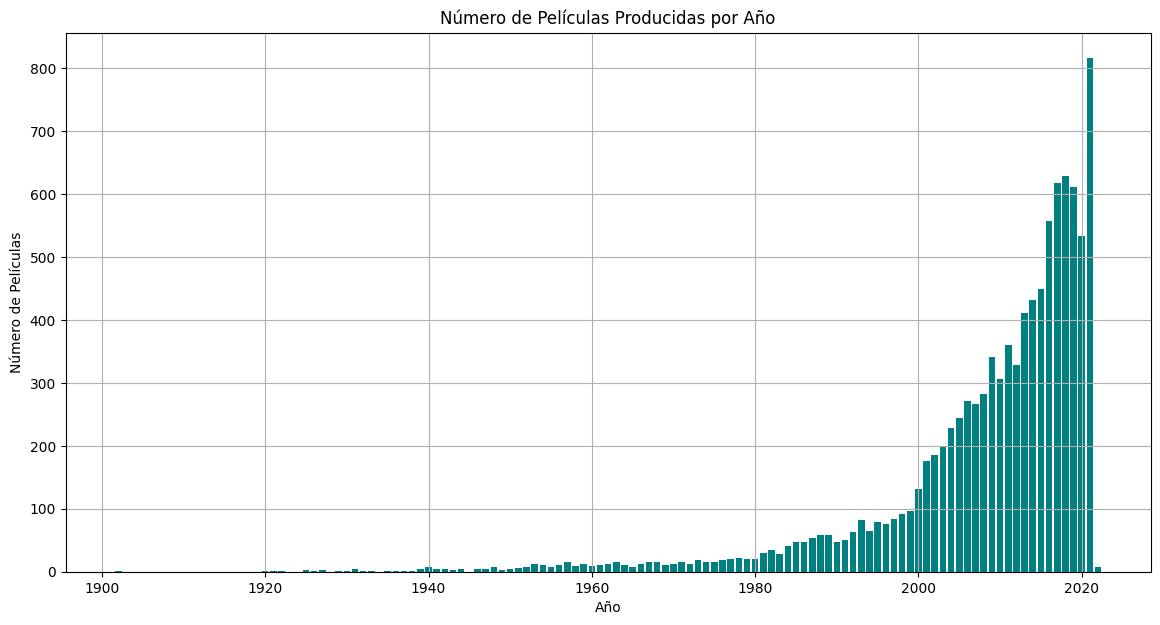

In [26]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'runtime' column to numeric, coercing errors to NaN
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['releaseYear'] = df['releaseDate'].dt.year

# Filter out films with missing runtime values
movies_per_year = df['releaseYear'].value_counts().sort_index()

# Find the year with the most movies
max_year = movies_per_year.idxmax()
# Find the number of movies produced in that year
max_movies = movies_per_year.max()

print(f"\nEl año con más películas fue {max_year}, con un total de {max_movies} películas.")

plt.figure(figsize=(14, 7))
plt.bar(movies_per_year.index, movies_per_year.values, color='teal')
plt.title('Número de Películas Producidas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()

**Análisis del Año con Mayor Producción Cinematográfica**

<small> El análisis del número de películas producidas por año revela una tendencia creciente en la producción cinematográfica, alcanzando un pico en **2021** con un total de **816 películas**. Este incremento es evidente en el gráfico adjunto, que muestra cómo la producción de películas ha aumentado significativamente en las últimas décadas.

El año 2021 se destaca como el año con la producción más alta registrada dentro del dataset. Este fenómeno puede atribuirse a varios factores, incluyendo el avance tecnológico que facilita la producción de películas, una mayor demanda de contenido debido a la expansión de plataformas de streaming, y posiblemente un repunte en la producción tras los retrasos causados por eventos globales como la pandemia de COVID-19, que impactó significativamente la industria en 2020.

Esta tendencia no solo refleja el crecimiento de la industria cinematográfica sino también un cambio en los hábitos de consumo de entretenimiento a nivel mundial, con un enfoque creciente hacia la diversidad de contenido y la accesibilidad digital. Este aumento en la producción también puede estar influenciado por la globalización del cine, donde más países y productores independientes están participando activamente en la creación de películas.

El gráfico de barras proporciona una visualización clara de estas tendencias, mostrando no solo el año con más producciones sino también cómo ha evolucionado la cantidad de películas a lo largo del tiempo, subrayando los cambios significativos y los nuevos desarrollos en la industria del cine.
</small>


**f. ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué género principal pertenecen las películas más largas?**


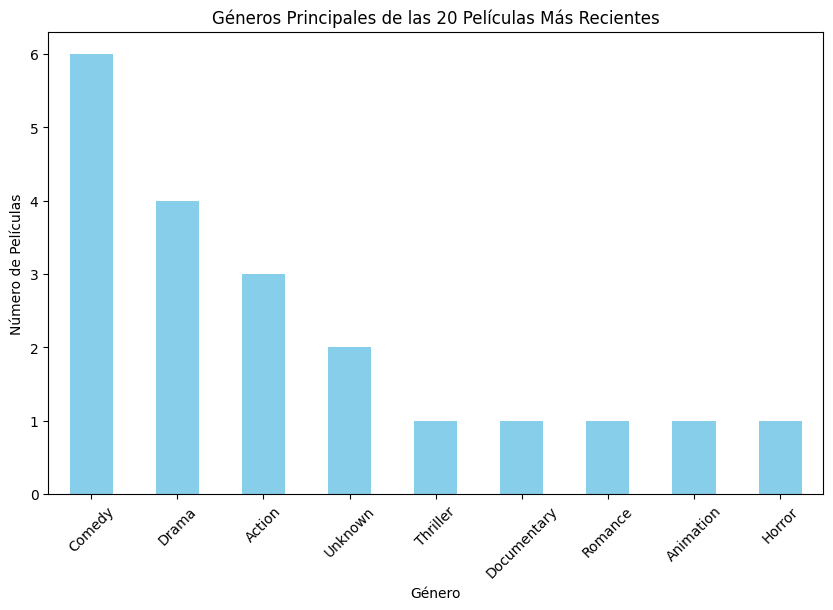

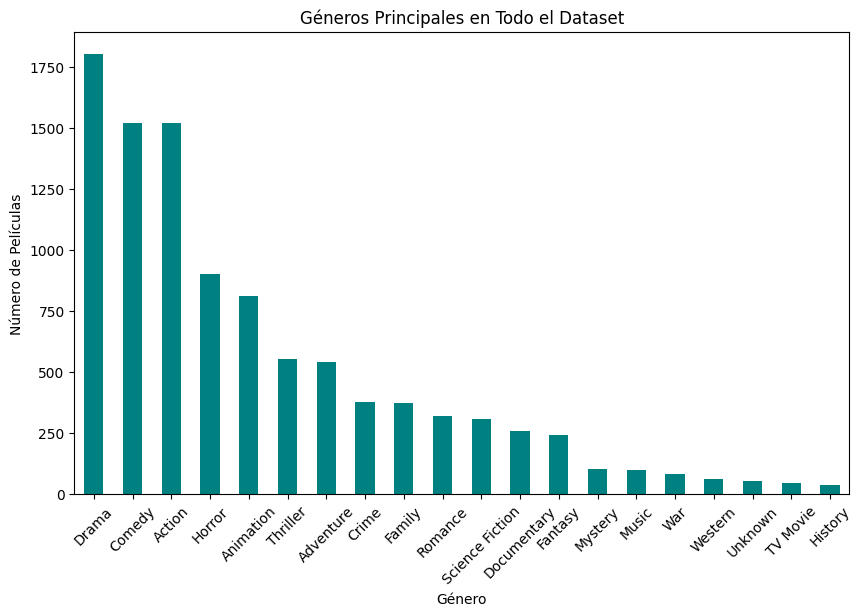

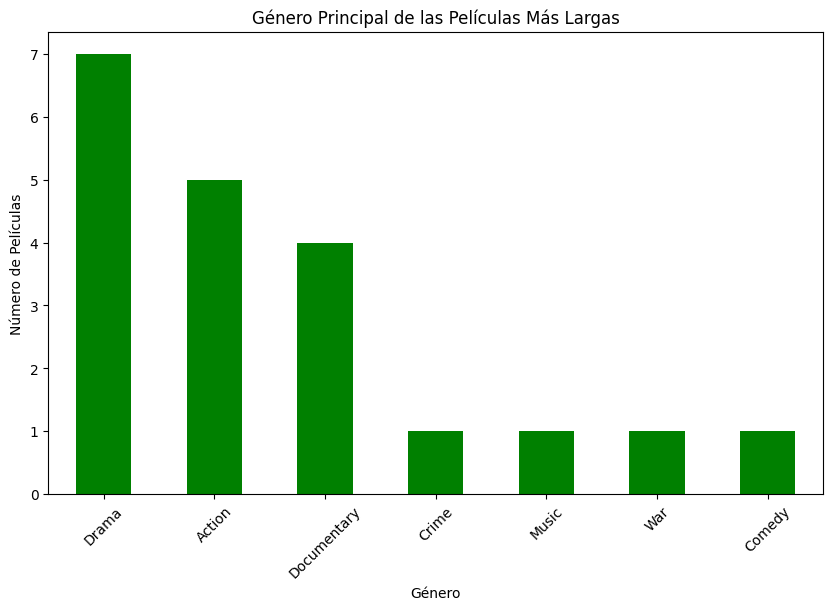

In [30]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['mainGenre'] = df['genres'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else 'Unknown')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Data for the first question: Genres of the 20 most recent films
df.sort_values(by='releaseDate', ascending=False, inplace=True)
recent_20 = df.head(20)
recent_genres_count = recent_20['mainGenre'].value_counts()

# Data for the second question: Predominant genre in the dataset
overall_genres_count = df['mainGenre'].value_counts()

# Data for the third question: Genre of the longest films
df.sort_values(by='runtime', ascending=False, inplace=True)
longest_films_genre = df.head(20)['mainGenre'].value_counts()

# Graph for the first question
plt.figure(figsize=(10, 6))
recent_genres_count.plot(kind='bar', color='skyblue')
plt.title('Géneros Principales de las 20 Películas Más Recientes')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

# Graph for the second question
plt.figure(figsize=(10, 6))
overall_genres_count.plot(kind='bar', color='teal')
plt.title('Géneros Principales en Todo el Dataset')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

# Graph for the third question
plt.figure(figsize=(10, 6))
longest_films_genre.plot(kind='bar', color='green')
plt.title('Género Principal de las Películas Más Largas')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()



**1. ¿Cuál es el género principal de las 20 películas más recientes?**

   <small>
   De las 20 películas más recientes, el género de "Comedia" es el más predominante, seguido por "Drama" y "Acción". Este predominio de la comedia podría sugerir una tendencia hacia películas con un tono más ligero y entretenido en los lanzamientos más recientes, posiblemente como respuesta a una demanda de escapismo y diversión por parte del público.
   </small>

**2. ¿Cuál es el género principal que predomina en el conjunto de datos?**

   <small>
   En el conjunto total de datos, el género "Drama" es el más predominante, seguido de cerca por "Comedia" y "Acción". Esto indica que, a lo largo de los años, las películas de drama han sido consistentemente populares, reflejando quizás su capacidad para explorar una amplia gama de temas humanos y sociales que resuenan con una amplia audiencia.
   </small>

**3. ¿A qué género principal pertenecen las películas más largas?**

   <small>
   Las películas más largas tienden a pertenecer al género de "Drama", seguido por "Acción" y "Documental". Este resultado es coherente con la naturaleza del género dramático, que a menudo se sumerge en narrativas complejas y profundas que requieren un tiempo de ejecución más extenso para desarrollarse completamente. Los documentales y las películas de acción también pueden requerir más tiempo para profundizar en sus respectivos temas o desarrollar secuencias de acción detalladas.
   </small>


**g. ¿Las películas de qué genero principal obtuvieron mayores ganancias?**


In [8]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'revenue' column to numeric, coercing errors to NaN
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Prepare the genre split and ensure there are no NaN values
df['genres'] = df['genres'].fillna('No establecido')  # Fill NaN values with 'No establecido'
split_genres = df['genres'].str.split('|')

#  Calculate the number of repeats per row, handling non-null values correctly
repeats = split_genres.apply(len)

# Expand the 'genres' column to account for all listed genres
all_genres = split_genres.explode()

# Repeat the rows of the original DataFrame according to the number of genres per film
df_expanded = df.loc[df.index.repeat(repeats)].copy()

# Reset the index to align correctly with 'all_genres'
df_expanded.reset_index(drop=True, inplace=True)

# Asign the exploded genres to the expanded DataFrame
df_expanded['genre'] = all_genres.values

# Calculate the revenue split evenly among the genres
df_expanded['revenue_per_genre'] = df_expanded['revenue'] / repeats.loc[repeats.index.repeat(repeats)].values

# Group by genre and sum the adjusted revenues
genre_revenue = df_expanded.groupby('genre')['revenue_per_genre'].sum()

# Sort the results
genre_revenue_sorted = genre_revenue.sort_values(ascending=False)

# Create a DataFrame from the sorted results
genre_revenue_df = genre_revenue_sorted.reset_index()
genre_revenue_df.columns = ['Género', 'Ganancias Totales']

# Format the 'Ganancias Totales' column as currency
genre_revenue_df['Ganancias Totales'] = genre_revenue_df['Ganancias Totales'].apply(lambda x: f"${x:,.0f}")

display(genre_revenue_df)

,Género,Ganancias Totales
0,Action,"$79,290,274,299"
1,Adventure,"$76,793,061,482"
2,Comedy,"$70,650,745,119"
3,Drama,"$65,469,629,316"
4,Thriller,"$42,706,815,001"
5,Fantasy,"$39,746,713,839"
6,Science Fiction,"$38,843,496,279"
7,Family,"$34,094,399,125"
8,Romance,"$27,031,576,981"
9,Animation,"$23,508,453,459"


**Análisis del Género de Película con Mayores Ganancias**

<small> Basado en el análisis de las ganancias totales por género principal en la industria cinematográfica, el género "Acción" lidera con una suma de aproximadamente $79.29 mil millones, seguido muy de cerca por "Aventura" con cerca de $76.79 mil millones. Esto refleja la popularidad y la capacidad de estos géneros para atraer grandes audiencias globales y generar ingresos significativos a través de lanzamientos en cines, mercadotecnia extensiva y ventas de derechos de distribución internacional.

Los géneros "Comedia" y "Drama" también muestran fuertes rendimientos, con ganancias de $70.65 mil millones y $65.47 mil millones, respectivamente, destacando su apelación universal y la flexibilidad para adaptarse a diversos mercados y demografías. Estos géneros tienden a requerir presupuestos más bajos comparados con las grandes producciones de "Acción" y "Aventura", pero aún así logran captar la atención del público y generar ganancias sustanciales.

Por otro lado, géneros como "Documentary" y "TV Movie" muestran ganancias relativamente bajas, lo que puede ser indicativo de su alcance más limitado y nicho de mercado específico. El bajo rendimiento en términos de ingresos de estos géneros podría también reflejar un modelo de distribución diferente, que a menudo no se centra en los ingresos de taquilla sino en plataformas de streaming o ventas directas a televisión.
</small>


**h. ¿La cantidad de actores influye en los ingresos de las películas? ¿Se han hecho películas con más actores en los últimos años?**



h.1: ¿La cantidad de actores influye en los ingresos de las películas?

Correlación entre el número de actores y los ingresos: 0.28



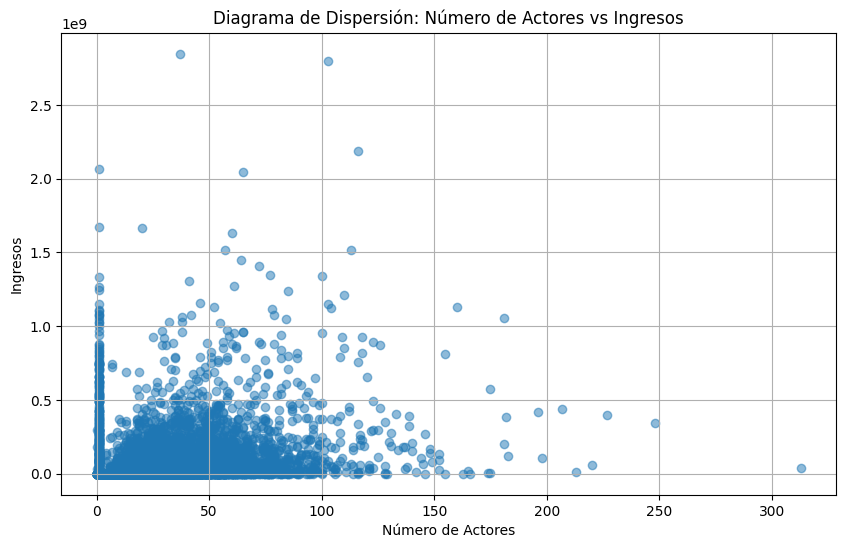

No hay una fuerte correlación entre el número de actores y los ingresos de las películas.
Por lo tanto, no se puede concluir que el número de actores influya significativamente en los ingresos de las películas.

h.2: ¿Se han hecho películas con más actores en los últimos años?



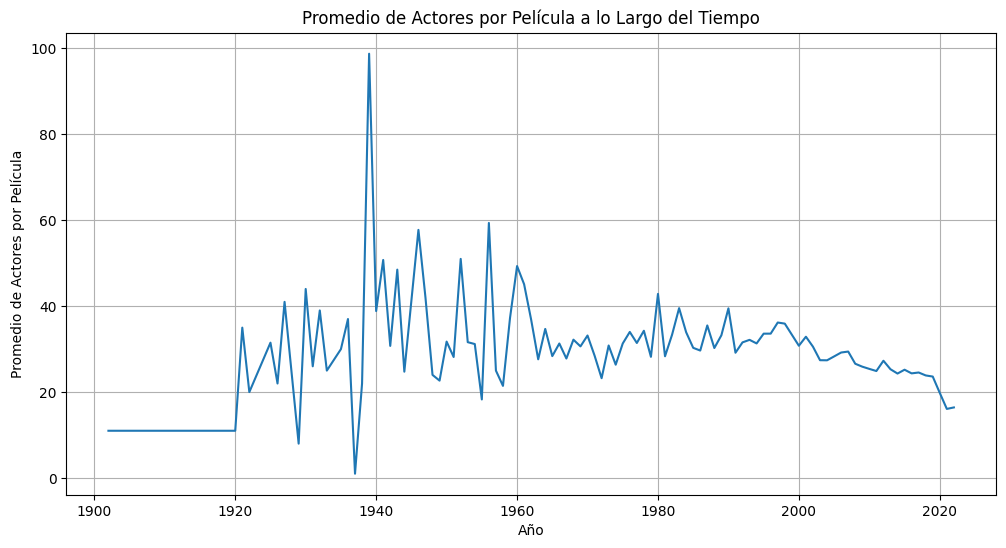

No se ha observado un incremento significativo en el número promedio de actores por película en los últimos años.


In [ ]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'revenue' and 'releaseDate' columns to numeric and datetime types, respectively
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# List of actors in the dataset separated by '|' and split into individual actors
df['numActors'] = df['actors'].fillna('').apply(lambda x: len(x.split('|')) if x != '' else 0)

# Analyze the correlation between the number of actors and revenue
correlation = df['numActors'].corr(df['revenue'])
print("\nh.1: ¿La cantidad de actores influye en los ingresos de las películas?\n")
print(f"Correlación entre el número de actores y los ingresos: {correlation:.2f}\n")

# Create a scatter plot to visualize the relationship between the number of actors and revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['numActors'], df['revenue'], alpha=0.5)
plt.title('Diagrama de Dispersión: Número de Actores vs Ingresos')
plt.xlabel('Número de Actores')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

# Analyze the correlation and provide a conclusion based on the strength of the correlation
if correlation > 0.5 or correlation < -0.5:
    print("Hay una fuerte correlación entre el número de actores y los ingresos de las películas.\n")
    print("Por lo tanto, es probable que el número de actores influya significativamente en los ingresos de las películas.")
else:
    print("No hay una fuerte correlación entre el número de actores y los ingresos de las películas.")
    print("Por lo tanto, no se puede concluir que el número de actores influya significativamente en los ingresos de las películas.")

# Analyze the trend of the number of actors over time
df['year'] = df['releaseDate'].dt.year
average_actors_per_year = df.groupby('year')['numActors'].mean()

print("\nh.2: ¿Se han hecho películas con más actores en los últimos años?\n")

# Create a graph to visualize the trend of the average number of actors per film over time
plt.figure(figsize=(12, 6))
average_actors_per_year.plot(title='Promedio de Actores por Película a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Promedio de Actores por Película')
plt.grid(True)
plt.show()

# Compare the average number of actors in the most recent years to the previous years
if average_actors_per_year.iloc[-10:].mean() > average_actors_per_year.iloc[:-10].mean():
    print("En los últimos años, se ha observado un incremento en el número promedio de actores por película.")
else:
    print("No se ha observado un incremento significativo en el número promedio de actores por película en los últimos años.")

**Análisis de la Influencia del Número de Actores en los Ingresos de las Películas y sus Tendencias Temporales**

<small> El análisis de correlación entre el número de actores y los ingresos de las películas revela un coeficiente de correlación de 0.28. Esta cifra indica una correlación débil, sugiriendo que la cantidad de actores en una película no tiene un impacto significativo en sus ingresos. En el gráfico, la mayoría de los puntos se aglomeran en el extremo inferior del eje de ingresos, lo que sugiere que tener más actores no garantiza automáticamente mayores ingresos. Este resultado puede deberse a que factores como la trama, la dirección, los efectos especiales y la promoción tienen un peso más determinante en el éxito financiero de una película que simplemente la cantidad de actores que aparecen en ella.

Adicionalmente, al examinar la tendencia del número promedio de actores por película a lo largo del tiempo, observamos que no ha habido un aumento significativo en los últimos años. Esta estabilidad sugiere que las prácticas de casting no han cambiado drásticamente en términos de cantidad de actores, lo que podría reflejar una consistencia en la producción cinematográfica o la adopción de tecnologías que permiten menos actores en escenas complejas, como el uso de efectos generados por computadora.
</small>


**i. ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?**

Correlación entre la cantidad de mujeres en el reparto y la popularidad: -0.00
Correlación entre la cantidad de hombres en el reparto y la popularidad: 0.00
Correlación entre la cantidad de mujeres en el reparto y los ingresos: -0.04
Correlación entre la cantidad de hombres en el reparto y los ingresos: -0.06


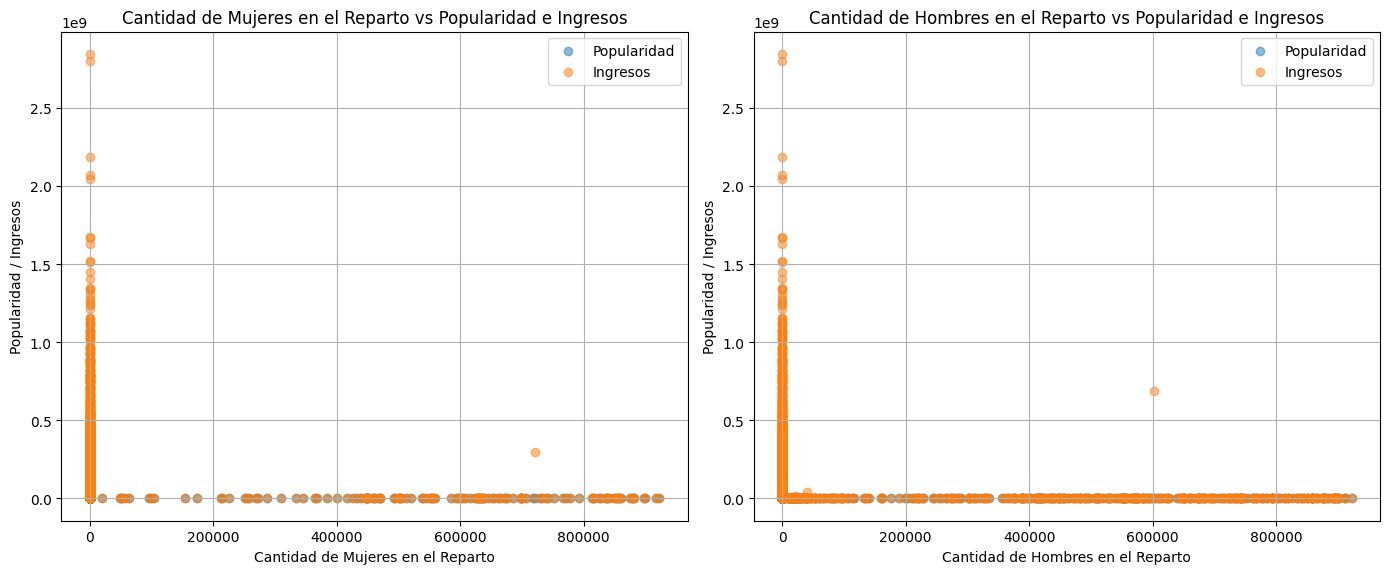

In [5]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')
# Convert the 'popularity' column to numeric, coercing errors to NaN
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['castWomenAmount'] = pd.to_numeric(df['castWomenAmount'], errors='coerce')
df['castMenAmount'] = pd.to_numeric(df['castMenAmount'], errors='coerce')

# Calculate the correlation between the number of men and women in the cast and the popularity and revenue of the movies
correlation_women_popularity = df['castWomenAmount'].corr(df['popularity'])
correlation_men_popularity = df['castMenAmount'].corr(df['popularity'])
correlation_women_revenue = df['castWomenAmount'].corr(df['revenue'])
correlation_men_revenue = df['castMenAmount'].corr(df['revenue'])

print("Correlación entre la cantidad de mujeres en el reparto y la popularidad: {:.2f}".format(correlation_women_popularity))
print("Correlación entre la cantidad de hombres en el reparto y la popularidad: {:.2f}".format(correlation_men_popularity))
print("Correlación entre la cantidad de mujeres en el reparto y los ingresos: {:.2f}".format(correlation_women_revenue))
print("Correlación entre la cantidad de hombres en el reparto y los ingresos: {:.2f}".format(correlation_men_revenue))

# Create scatter plots to visualize the relationships
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['castWomenAmount'], df['popularity'], alpha=0.5, label='Popularidad')
plt.scatter(df['castWomenAmount'], df['revenue'], alpha=0.5, label='Ingresos')
plt.title('Cantidad de Mujeres en el Reparto vs Popularidad e Ingresos')
plt.xlabel('Cantidad de Mujeres en el Reparto')
plt.ylabel('Popularidad / Ingresos')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['castMenAmount'], df['popularity'], alpha=0.5, label='Popularidad')
plt.scatter(df['castMenAmount'], df['revenue'], alpha=0.5, label='Ingresos')
plt.title('Cantidad de Hombres en el Reparto vs Popularidad e Ingresos')
plt.xlabel('Cantidad de Hombres en el Reparto')
plt.ylabel('Popularidad / Ingresos')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Interpretación de los resultados**

<small> La información y los gráficos generados sugieren que no hay una correlación significativa entre la cantidad de hombres o mujeres en el reparto y la popularidad o ingresos de las películas. Las correlaciones son extremadamente bajas, cercanas a cero, lo que indica que no hay una relación lineal aparente entre estas variables.


1. **Correlaciones Próximas a Cero:**
   - Una correlación de -0.00 a 0.00 entre la cantidad de mujeres y hombres en el reparto con la popularidad indica que, estadísticamente, la composición del género del reparto no tiene impacto en cuán popular es una película.
   - Una correlación de -0.04 a -0.06 con los ingresos es ligeramente negativa, pero aún tan cercana a cero que sugiere una falta de relación lineal significativa entre estos factores.

2. **Visualización en los Gráficos de Dispersión:**
   - Los gráficos de dispersión muestran una amplia dispersión de los puntos, sin un patrón claro que indique una relación entre las variables. Esto se alinea con los valores de correlación bajos.
   - La presencia de puntos a lo largo del eje x (con valores altos en el eje y, pero bajos o moderados en cantidad de actores) sugiere que hay películas con pocos actores de un género específico que alcanzan altos niveles de popularidad o ingresos, pero estos son casos aislados y no representan una tendencia general.

El análisis actual sugiere que la cantidad de actores hombres o mujeres en el reparto no influye significativamente en la popularidad o ingresos de las películas, según los datos y métodos utilizados.
</small>

**j. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?**

In [6]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Ordenar el DataFrame por la columna 'voteAvg' en orden descendente
sorted_df = df.sort_values(by='voteAvg', ascending=False)

# Seleccionar las 20 primeras filas del DataFrame ordenado
top_20_rated_films = sorted_df.head(20)

# Extraer los nombres de los directores de estas 20 películas
top_20_directors = top_20_rated_films[['originalTitle', 'director', 'voteAvg']]

# Mostrar el resultado
print("Los directores de las 20 películas mejor calificadas son:")
display(top_20_directors)

Los directores de las 20 películas mejor calificadas son:


,originalTitle,director,voteAvg
9875,El Chavo Del Ocho: Lo Mejor De Don Ramon,NaN,10.0
9733,Christmas at the Ranch,Christin Baker,10.0
8632,Hot Naked Sex & the City,Thomas Coven,10.0
9347,<U+30DD><U+30CB><U+30E7><U+306F><U+3053><U+304...,Kaku Arakawa,10.0
9990,Los Vengadores Chiflados,Miguel Angel Zavala,10.0
9246,Steven Universe: The Movie: Behind the Curtain,Rebecca Sugar,10.0
9298,Spirit of Vengeance: The Making of 'Ghost Rider',Laurent Bouzereau,10.0
9084,Vacaciones,Víctor Barba|Juan Olivares,10.0
6750,Dragon Ball Kami BEST [Bonus DVD],NaN,9.8
6885,The Spectacular Spider-Man Attack of the Lizard,Dave Bullock|Troy Adomitis|Victor Cook,9.6


**Conclusión sobre los Directores de las 20 Películas Mejor Calificadas**

<small> 
El análisis de las 20 películas mejor calificadas revela una diversidad de directores y géneros. Entre las películas con una calificación perfecta de 10, encontramos títulos como "El Chavo Del Ocho: Lo Mejor De Don Ramon" y "Christmas at the Ranch", dirigidas por Christin Baker y otros. También destacan directores como Thomas Coven con "Hot Naked Sex & the City" y Kaku Arakawa con un documental sobre Hayao Miyazaki.

Además, películas como "Los Vengadores Chiflados" de Miguel Angel Zavala y "Steven Universe: The Movie: Behind the Curtain" de Rebecca Sugar también alcanzaron la calificación perfecta. Otros directores notables incluyen a Laurent Bouzereau con "Spirit of Vengeance: The Making of 'Ghost Rider'" y Víctor Barba junto a Juan Olivares con "Vacaciones".

Entre las películas con calificaciones ligeramente inferiores pero aún sobresalientes, encontramos "Dragon Ball Kami BEST [Bonus DVD]" y "The Spectacular Spider-Man Attack of the Lizard", dirigidas por Dave Bullock, Troy Adomitis y Victor Cook. También se destacan "Doctor Strange: The Fabric of Reality" y "Bob Esponja: Días de Cangreburgers".

En resumen, los directores de las películas mejor calificadas provienen de una amplia gama de géneros y estilos, reflejando la diversidad y riqueza del cine contemporáneo.
</small>

**k. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión**

Correlación entre presupuesto e ingresos: 0.76


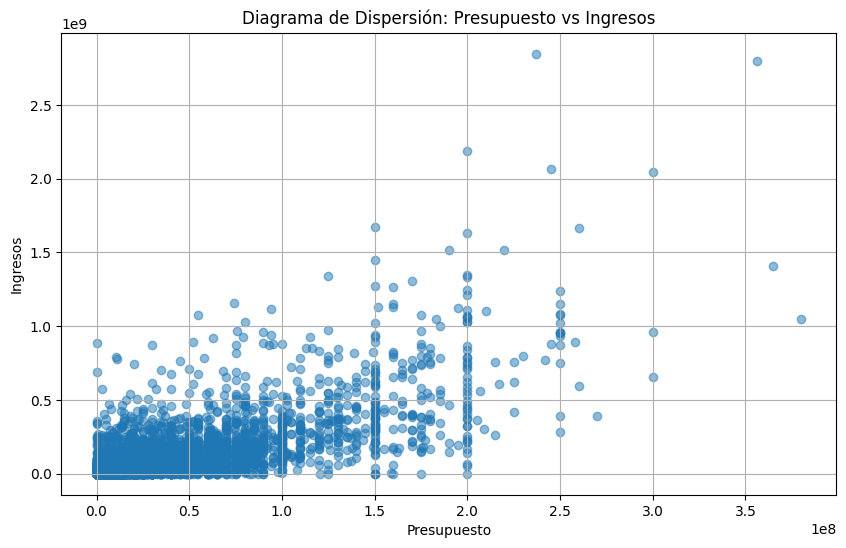

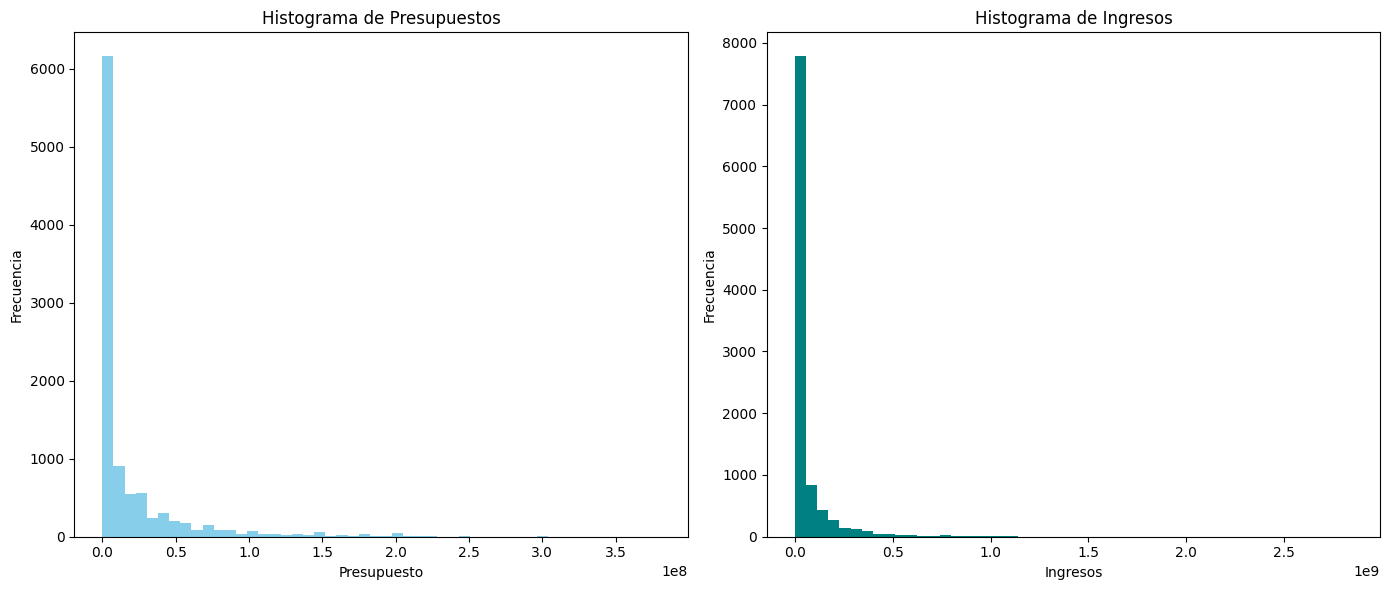

In [7]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'budget' column to numeric, coercing errors to NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Calculate the correlation between budget and revenue
correlation_budget_revenue = df['budget'].corr(df['revenue'])
print(f"Correlación entre presupuesto e ingresos: {correlation_budget_revenue:.2f}")

# Create a scatter plot to visualize the relationship between budget and revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Diagrama de Dispersión: Presupuesto vs Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

# Create histograms to visualize the distribution of budget and revenue
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['budget'].dropna(), bins=50, color='skyblue')
plt.title('Histograma de Presupuestos')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['revenue'].dropna(), bins=50, color='teal')
plt.title('Histograma de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


**Análisis de Correlación**

<small>La correlación entre el presupuesto y los ingresos es relativamente alta, con un valor de 0.76. Este valor indica una fuerte relación positiva entre las dos variables. Es decir, a medida que el presupuesto de una película aumenta, también tienden a aumentar sus ingresos, lo cual es un resultado esperado en la industria del cine donde producciones más costosas suelen tener mayores capacidades de marketing y producción, lo que potencialmente puede traducirse en mayores ingresos.

1. **Diagrama de Dispersión**:
   - El gráfico muestra una tendencia clara donde los ingresos aumentan con el aumento del presupuesto.
   - Aunque hay una relación positiva, también hay una variabilidad considerable en los ingresos para un rango dado de presupuestos, lo que sugiere que otros factores además del presupuesto también influyen significativamente en los ingresos.

2. **Histogramas**:
   - **Presupuestos**: La mayoría de las películas tienen presupuestos relativamente bajos, con una distribución altamente sesgada hacia la derecha, lo que indica que unas pocas películas tienen presupuestos extremadamente altos.
   - **Ingresos**: Similar al presupuesto, los ingresos también están altamente sesgados, con la mayoría de las películas ganando relativamente poco en comparación con unas pocas películas de alto ingreso.

Los altos presupuestos tienden a estar asociados con altos ingresos, como se refleja en la correlación de 0.76. Sin embargo, la relación no es perfecta y está influenciada por otros factores que no se han medido en este análisis. Esto significa que mientras que invertir más en la producción de una película puede aumentar las posibilidades de generar mayores ingresos, no garantiza automáticamente un éxito financiero. Además, dado que tanto los presupuestos como los ingresos tienen distribuciones altamente sesgadas y la presencia de valores atípicos es notable, es crucial para los inversores y productores evaluar cuidadosamente cada proyecto individualmente, considerando no solo el presupuesto sino también otros factores como el género de la película, el elenco, el director y las tendencias del mercado al momento del lanzamiento.

Este análisis sugiere que aunque hay una tendencia general de "más presupuesto, más ingresos", las decisiones de inversión en películas deben ser tomadas con una consideración cuidadosa de múltiples aspectos para maximizar las posibilidades de éxito financiero. </small>


**l. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?**


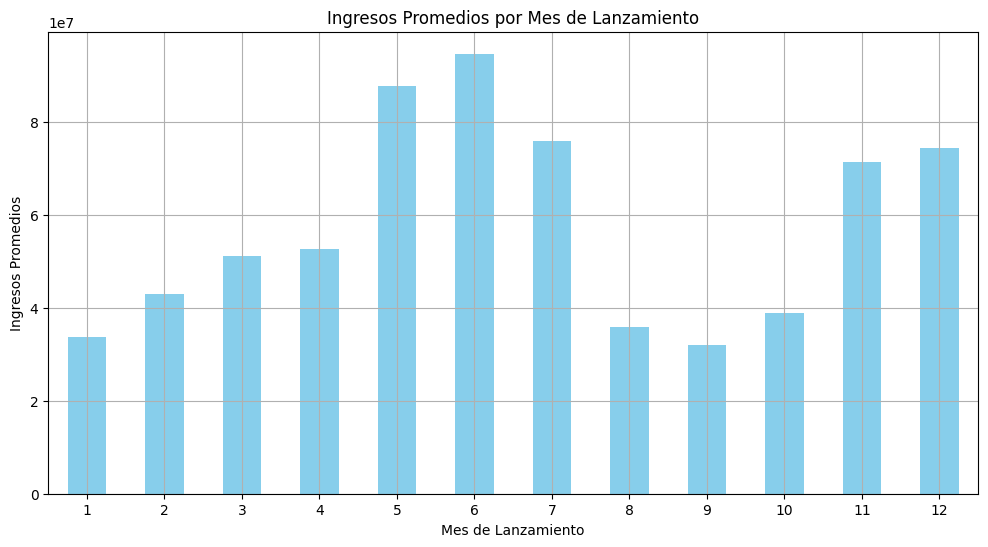

releaseMonth
1     3.377369e+07
2     4.290835e+07
3     5.111594e+07
4     5.259565e+07
5     8.784544e+07
6     9.474711e+07
7     7.602870e+07
8     3.597008e+07
9     3.192892e+07
10    3.898733e+07
11    7.149211e+07
12    7.435888e+07
Name: revenue, dtype: float64

In [8]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')


# Convert the 'releaseDate' column to datetime if not already done
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Extract the month from the 'releaseDate' column
df['releaseMonth'] = df['releaseDate'].dt.month

# Group by the release month and calculate the average revenue
average_revenue_by_month = df.groupby('releaseMonth')['revenue'].mean()

# Plot the average revenue by month
plt.figure(figsize=(12, 6))
average_revenue_by_month.plot(kind='bar', color='skyblue')
plt.title('Ingresos Promedios por Mes de Lanzamiento')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Ingresos Promedios')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Display the average revenue by month
average_revenue_by_month

<small> El análisis de los ingresos promedios por mes de lanzamiento sugiere una variabilidad significativa en el desempeño financiero de las películas según el mes en que se estrenan. Esta variación puede atribuirse a varios factores, incluyendo las vacaciones escolares, los periodos festivos, y la competencia entre estrenos de películas.

<h5> Análisis de los Resultados </h5>

Los datos muestran que los meses de mayo, junio, julio, noviembre y diciembre son los que registran mayores ingresos promedio. Este patrón no es sorprendente ya que coincide con el inicio del verano y la temporada de vacaciones de invierno en muchos países, momentos en los que las audiencias tienden a ser más grandes debido a las vacaciones escolares y festividades importantes como Navidad y Año Nuevo.

- **Mayo, Junio y Julio**: Estos meses marcan el inicio de la temporada de blockbuster en verano, conocida por el lanzamiento de grandes producciones con altos presupuestos que suelen atraer a grandes audiencias.
- **Noviembre y Diciembre**: Este periodo coincide con las vacaciones de invierno y festividades como la Navidad y el Año Nuevo, cuando las familias tienen más tiempo libre para ir al cine. Además, muchos estudios lanzan sus películas más prestigiosas durante este tiempo para que sean elegibles para la temporada de premios.

Por otro lado, los meses de enero y septiembre muestran los ingresos promedios más bajos. Estos meses pueden considerarse como periodos de "valle" en la industria cinematográfica:
- **Enero**: Conocido a menudo como el mes de "limpieza" en la industria del cine, donde se estrenan películas que no se espera que tengan un alto rendimiento.
- **Septiembre**: Tras el fin del verano, este mes a menudo ve una reducción en el número de estrenos importantes y en la asistencia al cine.

Los datos sugieren claramente que ciertos meses del año están asociados con mejores ingresos debido a factores estratégicos de lanzamiento y a la mayor disponibilidad de la audiencia. Los productores y distribuidores de películas pueden aprovechar esta información para planificar el lanzamiento de sus películas de manera que maximicen su potencial de ingresos, prefiriendo los meses de alto rendimiento para lanzar sus producciones más importantes y potencialmente más rentables.

Esta estrategia de lanzamiento puede ser crucial para el éxito financiero de las películas, especialmente en un mercado competitivo donde la elección del momento del lanzamiento puede influir significativamente en el rendimiento de taquilla de una película. </small>

**m. ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿Cuántas películas, en promedio, se han lanzado por mes?**


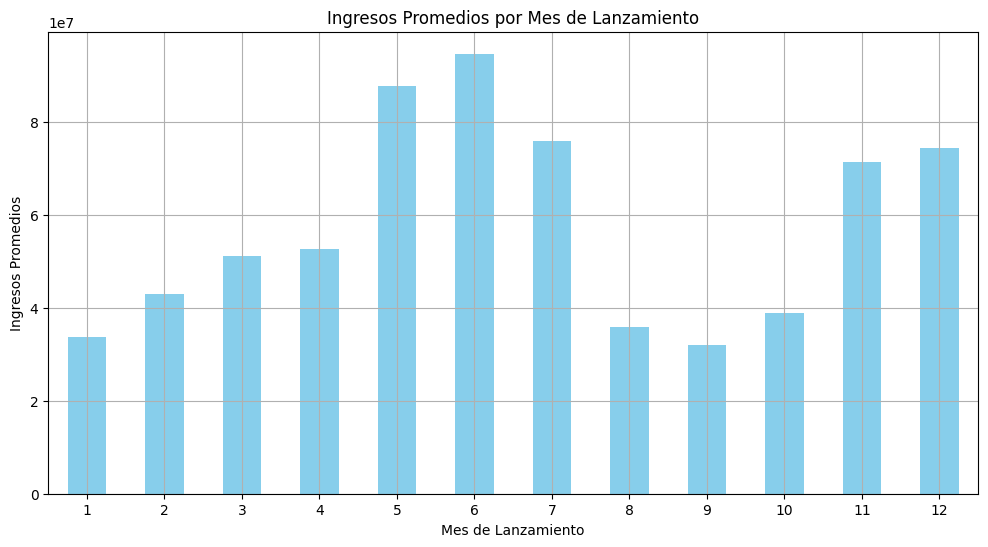

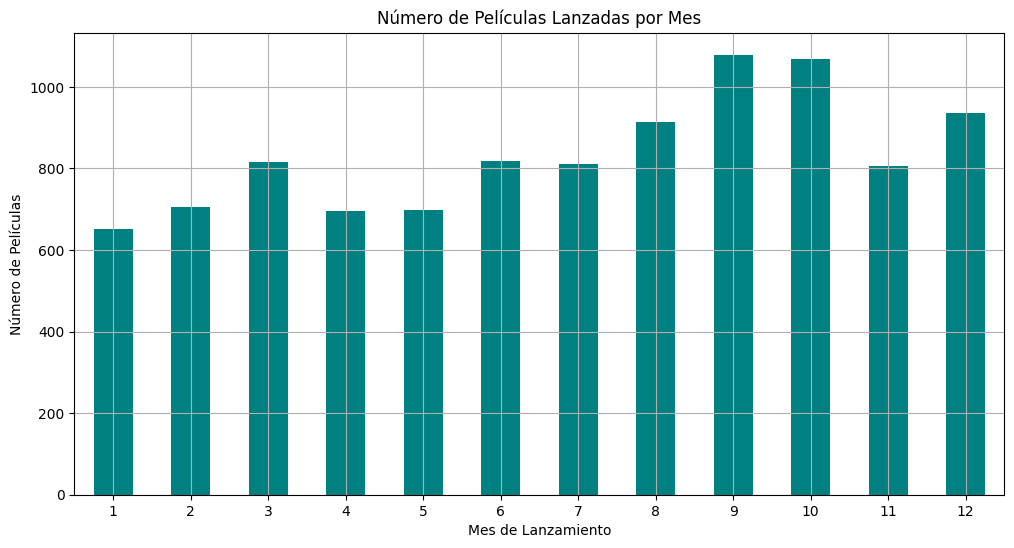

Ingresos Promedios por Mes de Lanzamiento:


releaseMonth
1     3.377369e+07
2     4.290835e+07
3     5.111594e+07
4     5.259565e+07
5     8.784544e+07
6     9.474711e+07
7     7.602870e+07
8     3.597008e+07
9     3.192892e+07
10    3.898733e+07
11    7.149211e+07
12    7.435888e+07
Name: revenue, dtype: float64

Número de Películas Lanzadas por Mes:


releaseMonth
1      652
2      706
3      815
4      696
5      698
6      819
7      812
8      913
9     1079
10    1068
11     807
12     935
Name: count, dtype: int64

In [14]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'releaseDate' column to datetime if not already done
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Extract the month from the 'releaseDate' column
df['releaseMonth'] = df['releaseDate'].dt.month

# Group by the release month and calculate the average revenue
average_revenue_by_month = df.groupby('releaseMonth')['revenue'].mean()

# Group by the release month and calculate the number of movies released
movies_per_month = df['releaseMonth'].value_counts().sort_index()

# Plot the average revenue by month
plt.figure(figsize=(12, 6))
average_revenue_by_month.plot(kind='bar', color='skyblue')
plt.title('Ingresos Promedios por Mes de Lanzamiento')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Ingresos Promedios')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Plot the number of movies released by month
plt.figure(figsize=(12, 6))
movies_per_month.plot(kind='bar', color='teal')
plt.title('Número de Películas Lanzadas por Mes')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Número de Películas')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Display the average revenue by month and the number of movies released by month
print("Ingresos Promedios por Mes de Lanzamiento:")
display(average_revenue_by_month)

print("Número de Películas Lanzadas por Mes:")
display(movies_per_month)

<small>

**Análisis de los Ingresos Promedios por Mes de Lanzamiento**

- **Meses con Mayores Ingresos**: Mayo, junio, julio, noviembre y diciembre son los meses que registran los mayores ingresos promedios. Esto es típicamente atribuible a las temporadas de vacaciones y los lanzamientos estratégicos de blockbusters y películas familiares durante estos períodos.
- **Tendencias Observadas**: El verano (mayo, junio, julio) y el final del año (noviembre y diciembre) son claramente los períodos más lucrativos para la industria del cine. Estos meses coinciden con vacaciones escolares y festividades, aumentando la asistencia al cine.

**Análisis del Número de Películas Lanzadas por Mes**

- **Meses con Mayor Número de Lanzamientos**: Los meses de septiembre y octubre muestran el mayor número de lanzamientos de películas. Esto puede estar relacionado con el intento de los estudios de lanzar películas después del verano pero antes de la temporada alta de invierno, buscando capturar la atención del público en un período menos competitivo.
- **Variaciones Estacionales**: Aunque septiembre y octubre tienen el mayor número de lanzamientos, no coinciden con los ingresos más altos, lo que podría indicar una saturación del mercado o una preferencia del público por tipos específicos de películas durante otros meses.

**Conclusión Global**

- **Estrategia de Lanzamiento Óptima**: Para maximizar los ingresos, los estudios podrían considerar lanzar sus películas más importantes durante mayo, junio, julio, noviembre y diciembre. Estos meses no solo han demostrado ser los más rentables en términos de ingresos promedios, sino que también coinciden con períodos de alta asistencia al cine debido a las vacaciones y festividades.
- **Consideraciones de Competencia y Saturación**: Aunque septiembre y octubre ven muchos lanzamientos, la estrategia de lanzar durante estos meses podría no ser tan efectiva en términos de ingresos generados. Los estudios deben ser cautelosos de no saturar el mercado, lo que puede diluir el potencial de ingresos de cada película individual.
- **Planificación Estratégica**: La distribución de lanzamientos y la planificación estratégica en torno a la temporada y el tipo de película son cruciales. Los estudios deben considerar estos factores al decidir las fechas de lanzamiento para optimizar tanto el alcance como los ingresos.

 Estos hallazgos sugieren que, además de la calidad de la película y el marketing, el timing del lanzamiento es un factor crucial que puede afectar significativamente el éxito financiero de las producciones cinematográficas. </small>

**n. ¿Cómo se correlacionan las calificaciones con el éxito comercial?**

Correlación entre calificaciones e ingresos: 0.14


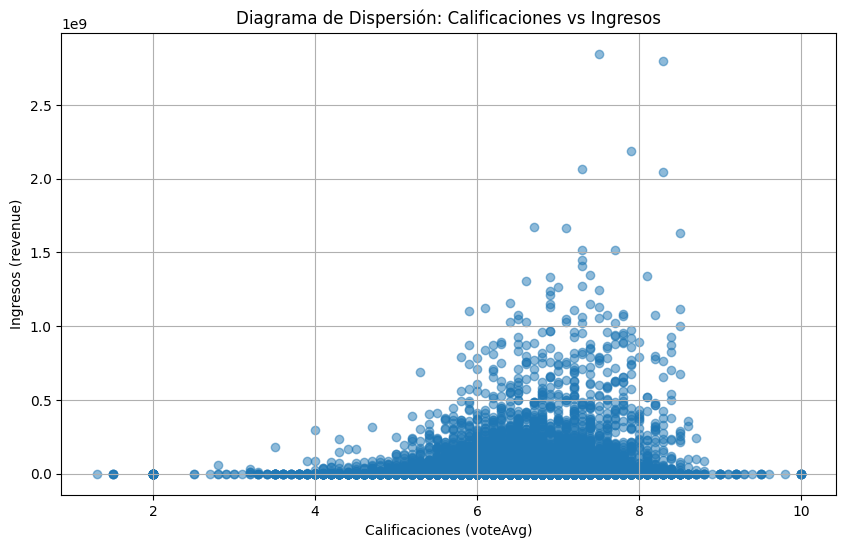

In [15]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Calcular la correlación entre las calificaciones y los ingresos
correlation_voteAvg_revenue = df['voteAvg'].corr(df['revenue'])
print(f"Correlación entre calificaciones e ingresos: {correlation_voteAvg_revenue:.2f}")

# Crear un diagrama de dispersión para visualizar la relación entre calificaciones e ingresos
plt.figure(figsize=(10, 6))
plt.scatter(df['voteAvg'], df['revenue'], alpha=0.5)
plt.title('Diagrama de Dispersión: Calificaciones vs Ingresos')
plt.xlabel('Calificaciones (voteAvg)')
plt.ylabel('Ingresos (revenue)')
plt.grid(True)
plt.show()


<small> El análisis de la correlación entre las calificaciones de las películas y sus ingresos comerciales ha generado un coeficiente de correlación de 0.14. Este valor sugiere una relación muy débil entre las calificaciones promedio que reciben las películas y los ingresos que generan.

### Análisis de los Resultados

1. **Correlación Baja**:
   - Un coeficiente de correlación de 0.14 indica que hay poca o ninguna relación lineal directa entre cómo una película es calificada y cuánto dinero gana. Esto puede implicar que los ingresos de una película dependen de múltiples factores además de las calificaciones, como el presupuesto de marketing, la fecha de lanzamiento, la presencia de estrellas de cine, entre otros.
  
2. **Diagrama de Dispersión**:
   - El diagrama muestra que mientras hay películas con altas calificaciones dispersas a través de un amplio rango de ingresos, muchas películas con ingresos sustanciales no necesariamente poseen altas calificaciones. Esto sugiere que las películas pueden ser comercialmente exitosas sin necesariamente ser altamente valoradas en términos de calificaciones.
   - Es notable que algunas películas con calificaciones cerca del promedio (alrededor de 6 a 8) logran generar ingresos significativos, lo que podría indicar el impacto de otros factores como el género de la película, la campaña de marketing, o la temporalidad de su lanzamiento.

El éxito comercial de una película no está fuertemente ligado a sus calificaciones. Esto resalta la importancia de considerar una estrategia integral que incluya marketing eficaz, selección estratégica de la fecha de lanzamiento y la influencia de factores contextuales y de mercado. Las calificaciones, aunque valiosas por razones de prestigio y como una medida de la calidad percibida, no son predictores confiables de éxito financiero.

Este hallazgo es crucial para los productores y distribuidores al planificar sus lanzamientos y campañas de marketing, sugiriendo que podrían beneficiarse más al enfocarse en cómo posicionan sus películas en el mercado en lugar de centrarse exclusivamente en maximizar las calificaciones. </small>

**o. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?**

Correlación entre la presencia de videos promocionales y los ingresos: -0.03
Correlación entre la presencia de páginas oficiales y los ingresos: 0.19


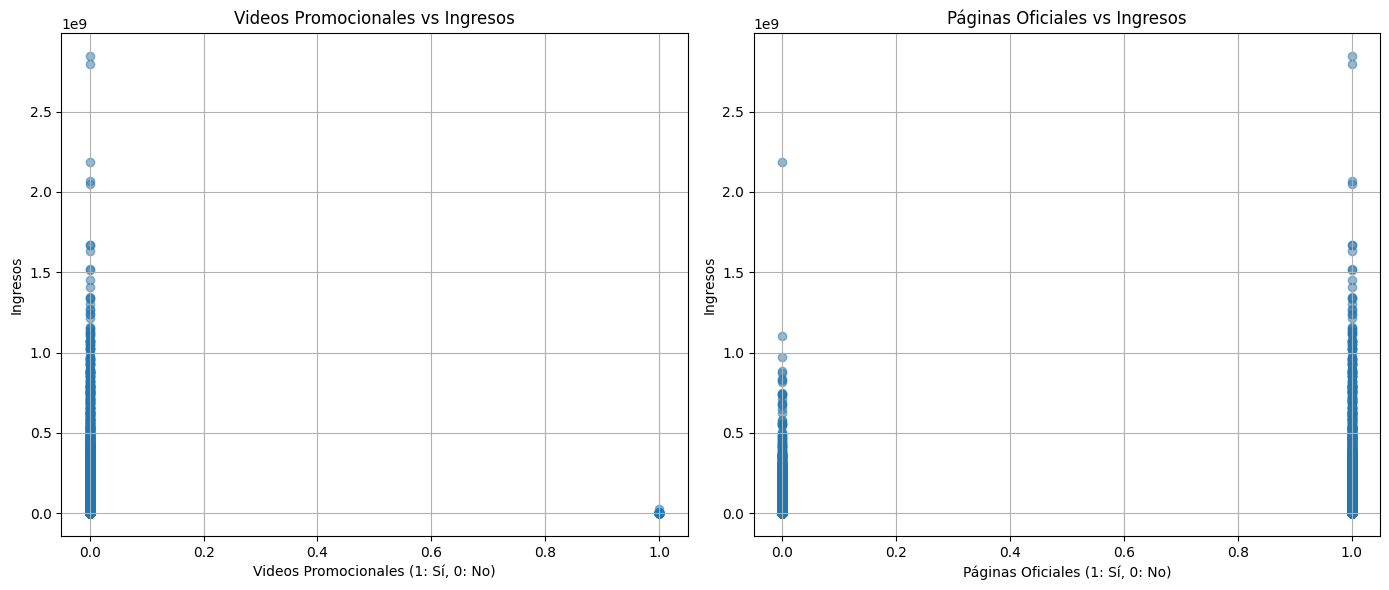

In [16]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Crear un nuevo DataFrame con las columnas relevantes
marketing_df = df[['revenue', 'video', 'homePage']].copy()

# Convertir la columna 'video' a valores numéricos (1 para True, 0 para False)
marketing_df['video'] = marketing_df['video'].apply(lambda x: 1 if str(x).lower() == 'true' else 0)

# Crear una columna 'hasHomePage' que indica si la película tiene una página oficial (1 para sí, 0 para no)
marketing_df['hasHomePage'] = marketing_df['homePage'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Calcular la correlación entre las estrategias de marketing y los ingresos
correlation_video_revenue = marketing_df['video'].corr(marketing_df['revenue'])
correlation_homePage_revenue = marketing_df['hasHomePage'].corr(marketing_df['revenue'])

print(f"Correlación entre la presencia de videos promocionales y los ingresos: {correlation_video_revenue:.2f}")
print(f"Correlación entre la presencia de páginas oficiales y los ingresos: {correlation_homePage_revenue:.2f}")

# Crear gráficos para visualizar la relación entre las estrategias de marketing y los ingresos
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(marketing_df['video'], marketing_df['revenue'], alpha=0.5)
plt.title('Videos Promocionales vs Ingresos')
plt.xlabel('Videos Promocionales (1: Sí, 0: No)')
plt.ylabel('Ingresos')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(marketing_df['hasHomePage'], marketing_df['revenue'], alpha=0.5)
plt.title('Páginas Oficiales vs Ingresos')
plt.xlabel('Páginas Oficiales (1: Sí, 0: No)')
plt.ylabel('Ingresos')
plt.grid(True)

plt.tight_layout()
plt.show()


<small>La correlación entre las estrategias de marketing digital, específicamente la presencia de videos promocionales y páginas oficiales, y los ingresos de las películas proporciona una perspectiva interesante sobre la eficacia de estas herramientas de marketing.

#### Análisis de Correlaciones
1. **Videos Promocionales (Correlación de -0.03)**:
   - La correlación negativa mínima sugiere que no hay una relación significativa entre la presencia de videos promocionales y los ingresos de las películas. Esto podría indicar que simplemente tener un video promocional no garantiza un aumento en los ingresos o que otros factores pueden ser más determinantes en el éxito financiero de una película.
   
2. **Páginas Oficiales (Correlación de 0.19)**:
   - Una correlación de 0.19, aunque modesta, es positiva y sugiere una asociación débil pero existente entre tener una página oficial y obtener mayores ingresos. Esto puede reflejar el hecho de que las páginas oficiales pueden servir como plataformas efectivas para la consolidación de contenido de marketing, información sobre la película, y engagement con el público, lo que potencialmente podría traducirse en un mayor interés y, por ende, mayores ingresos.

#### Interpretación de los Gráficos
- **Gráfico de Videos Promocionales vs Ingresos**:
   - La dispersión no muestra un patrón claro que indique una ventaja significativa de tener videos promocionales en términos de ingresos.
   
- **Gráfico de Páginas Oficiales vs Ingresos**:
   - Hay una mayor dispersión de puntos en la categoría de películas con páginas oficiales, incluyendo algunas con ingresos muy altos, lo que puede sugerir que las películas con páginas oficiales tienen el potencial de alcanzar ingresos superiores.

Los datos sugieren que las páginas oficiales pueden ser una herramienta de marketing más efectiva en términos de impacto en los ingresos en comparación con los videos promocionales. La presencia de una página oficial puede proporcionar un centro para el engagement y la información que potencialmente atrae a más espectadores, lo cual puede traducirse en mayores ingresos. Por otro lado, los videos promocionales, aunque importantes para la visibilidad inicial y la viralización del contenido, no parecen tener un impacto directo y significativo en los ingresos por sí solos según los datos disponibles.</small>

**p. ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?**

Correlación entre la popularidad del elenco y los ingresos: 0.08


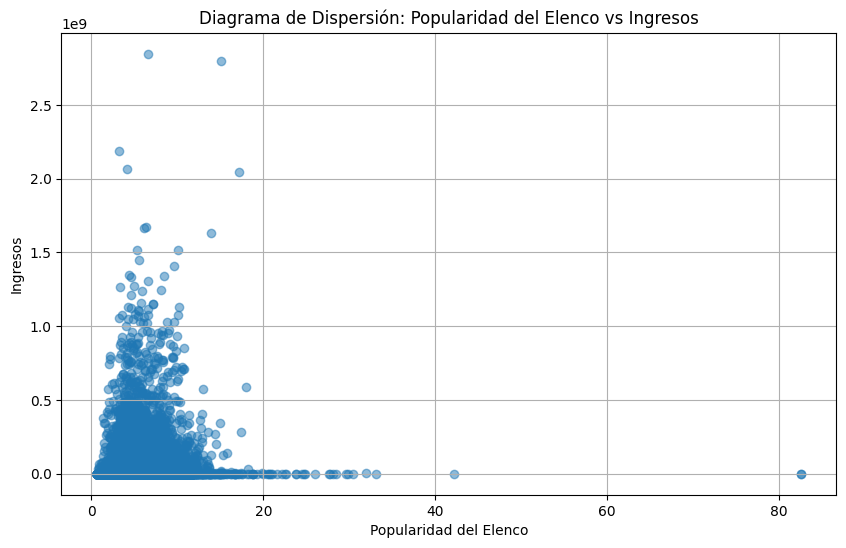

In [19]:
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# Convert the 'actorsPopularity' column to numeric values, coercing errors to NaN
def calculate_mean_popularity(x):
	values = [float(i) for i in str(x).split('|') if i.replace('.', '', 1).isdigit()]
	return np.mean(values) if values else np.nan

df['actorsPopularity'] = df['actorsPopularity'].apply(lambda x: calculate_mean_popularity(x) if pd.notnull(x) and x != '' else np.nan)

# Calculate the correlation between the average popularity of the cast and the revenue
correlation_cast_popularity_revenue = df['actorsPopularity'].corr(df['revenue'])
print(f"Correlación entre la popularidad del elenco y los ingresos: {correlation_cast_popularity_revenue:.2f}")

# Create a scatter plot to visualize the relationship between cast popularity and revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['actorsPopularity'], df['revenue'], alpha=0.5)
plt.title('Diagrama de Dispersión: Popularidad del Elenco vs Ingresos')
plt.xlabel('Popularidad del Elenco')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

<small>El análisis sobre la relación entre la popularidad del elenco y los ingresos de taquilla revela una correlación baja de 0.08. Este valor indica una asociación muy débil entre estos dos factores.

### Análisis del Diagrama de Dispersión
- **Distribución de los Datos**: La mayoría de los puntos se concentran en la parte inferior del gráfico, indicando que muchas películas con un elenco de variada popularidad tienden a generar ingresos bajos a moderados.
- **Ausencia de Tendencia Clara**: No se observa una tendencia clara que sugiera que un elenco más popular garantice ingresos significativamente más altos. Aunque hay algunos casos en los que películas con elencos populares lograron altos ingresos, estos son relativamente pocos y no establecen una regla general.

La popularidad del elenco no parece ser un determinante fuerte del éxito comercial de una película. Aunque intuitivamente podríamos esperar que películas con actores más populares y reconocidos generen mayores ingresos debido a su capacidad para atraer a más público, los datos no respaldan esta suposición de manera significativa.</small>